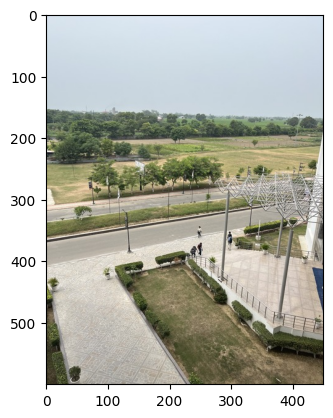

In [7]:
#Getting an image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def rgb2gray(rgb):
  return np.dot(rgb[...,:3],[0.299,0.587,0.144])
img_rgb=mpimg.imread("/content/CTU.jpg")
plt.imshow(img_rgb)
plt.show()


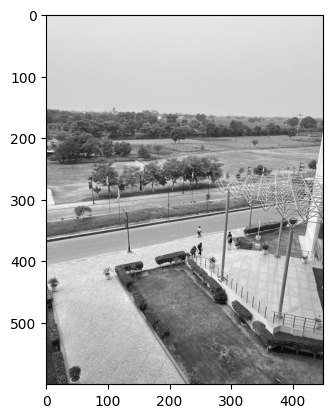

In [9]:
#Converting image from rgb to gray
img_gray=rgb2gray(img_rgb)
plt.imshow(img_gray,cmap=plt.get_cmap('gray'))
plt.savefig("CTU_Gray.jpg")
plt.show()


In [10]:
#Noise Reduction Using Gaussian Blur
from PIL import Image,ImageFilter
img=Image.open("/content/CTU_Gray.jpg")
imgg=img.filter(ImageFilter.GaussianBlur(radius=2))
imgg.save("CTU_blur.png")
imgg.show()

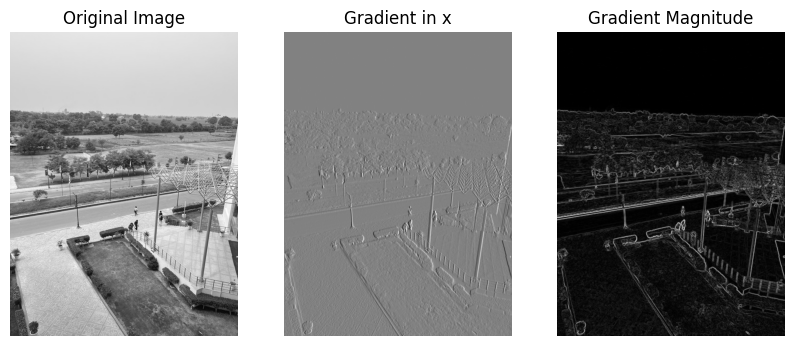

In [13]:
#Gradient Calculation
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image (replace with your own image)
image = cv2.imread('/content/CTU.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate gradient using Sobel operators
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Display the original image and the gradient magnitude
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(1, 3, 2), plt.imshow(grad_x, cmap='gray')
plt.title('Gradient in x'), plt.axis('off')

plt.subplot(1, 3, 3), plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude'), plt.axis('off')

plt.show()


In [14]:
# Apply non-maximum suppression to the gradient magnitude
suppressed = np.zeros_like(gradient_magnitude)
for i in range(1, gradient_magnitude.shape[0] - 1):
    for j in range(1, gradient_magnitude.shape[1] - 1):
        if gradient_magnitude[i, j] > gradient_magnitude[i - 1, j] and gradient_magnitude[i, j] > gradient_magnitude[i + 1, j] and gradient_magnitude[i, j] > gradient_magnitude[i, j - 1] and gradient_magnitude[i, j] > gradient_magnitude[i, j + 1]:
            suppressed[i, j] = gradient_magnitude[i, j]
# Apply hysteresis thresholding to the suppressed gradient magnitude
edges = np.zeros_like(suppressed)
for i in range(1, suppressed.shape[0] - 1):
    for j in range(1, suppressed.shape[1] - 1):
        if suppressed[i, j] > 0.5 * np.max(suppressed) and suppressed[i, j] > suppressed[i - 1, j] and suppressed[i, j] > suppressed[i + 1, j] and suppressed[i, j] > suppressed[i, j - 1] and suppressed[i, j] > suppressed[i, j + 1]:
            edges[i, j] = 255

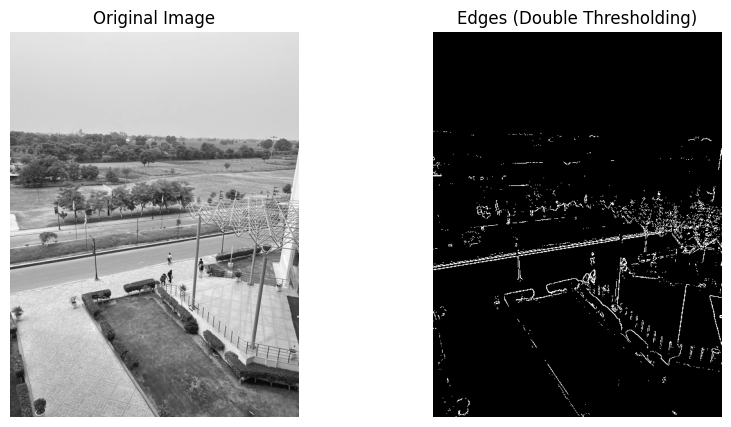

In [20]:
#Double threshold;
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Load the image in grayscale
image = io.imread('/content/CTU.jpg', as_gray=True)

# Gradient magnitude calculation (using Sobel operators)
gradient_x = np.gradient(image, axis=0)
gradient_y = np.gradient(image, axis=1)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Double thresholding
low_threshold = 0.2  # Adjust these thresholds as needed
high_threshold = 0.6

edges = np.zeros_like(gradient_magnitude)
edges[gradient_magnitude > high_threshold] = 255
edges[(gradient_magnitude <= high_threshold) & (gradient_magnitude >= low_threshold)] = 128

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges (Double Thresholding)')
plt.axis('off')

plt.show()


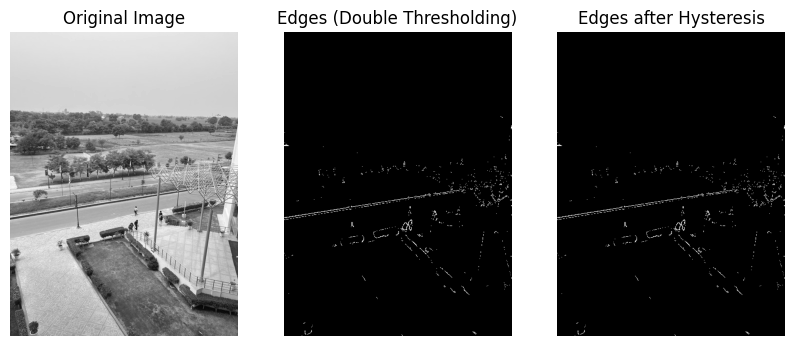

In [21]:
#Edge Tracking by Hysteresis.
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def hysteresis_edge_tracking(edges, low_threshold, high_threshold):
    visited = np.zeros_like(edges, dtype=np.uint8)
    edge_points = []

    def dfs(i, j):
        if i < 0 or i >= edges.shape[0] or j < 0 or j >= edges.shape[1]:
            return
        if visited[i, j] or edges[i, j] < low_threshold:
            return
        visited[i, j] = 255
        edge_points.append((i, j))

        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                dfs(i + di, j + dj)

    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            if edges[i, j] >= high_threshold and not visited[i, j]:
                dfs(i, j)

    edges_after_hysteresis = np.zeros_like(edges)
    for i, j in edge_points:
        edges_after_hysteresis[i, j] = 255

    return edges_after_hysteresis

# Load the image in grayscale
image = io.imread("/content/CTU.jpg", as_gray=True)

# Perform Canny edge detection (sobel edge detection)
gradient_x = np.gradient(image, axis=0)
gradient_y = np.gradient(image, axis=1)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Double thresholding
low_threshold = 0.1  # Adjust these thresholds as needed
high_threshold = 0.3

edges = np.zeros_like(gradient_magnitude)
edges[gradient_magnitude > high_threshold] = 255

# Apply hysteresis edge tracking
edges_after_hysteresis = hysteresis_edge_tracking(edges, low_threshold, high_threshold)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges (Double Thresholding)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges_after_hysteresis, cmap='gray')
plt.title('Edges after Hysteresis')
plt.axis('off')

plt.show()


